In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Movie Rating Prediction

- Fetching Clean Data (Cleaned Using clean_review.py)
- Vectorization
- Model Training
- Scores and Predictions
- Confusion Matrix

### 1. Fetching Clean Data

In [27]:
with open("./Clean_Datasets/imdb_trainX.txt", encoding = "utf8") as f:
    X_train = f.readlines()
with open("./Datasets/imdb_testY.txt") as f:
    Y_train = f.readlines()

In [28]:
X_train = np.array(X_train)
Y_train = np.array(Y_train).astype('int')

In [29]:
print(X_train.shape, Y_train.shape)

(25000,) (25000,)


In [30]:
print(X_train[:5])
print(Y_train[:5])

[' love   movi  sinc        saw     open  day     touch   beauti   strongli  recommend  see       movi   watch    famili   far   mpaa  rate  pg     themat  element  prolong  scene   disastor  nuditi  sexual    languag \n'
 'first  thing  first  edison  chen    fantast  believ  job    cambodian  hit  man  born   bred    dump    gladiatori  ring    hone   craft   savag  batteri   order   surviv  live    mantra   kill    kill    role    littl  dialogu    least    line   cambodian  thai   perform   compel  probabl        jet  li  vehicl  danni   dog    man   bred    sole  purpos   fight    someon  els   leash  like  danni   dog   much  talk   bare  knuckl  fight  sequenc    choreograph  stylist   rather  design   normal  brutal  fisticuff   everyth  goe   probabl  brought   sens   realism   grit    see   charact  slug        throat   defend    live   take   away   other     grim  gritti   dark  movi   liter   figur    set   apart    usual  run    mill  cop  thriller  product  edison  play 

### 2. Vectorization

In [31]:
cv = CountVectorizer()

In [32]:
X_train_st = cv.fit_transform(X_train)

In [33]:
cv.transform(X_train[4 : 10]).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
features = cv.get_feature_names()

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
features

['aa',
 'aaa',
 'aaaaaaah',
 'aaaaah',
 'aaaaatch',
 'aaaahhhhhhh',
 'aaaand',
 'aaaarrgh',
 'aaah',
 'aaargh',
 'aaaugh',
 'aaawwwwnnn',
 'aachen',
 'aada',
 'aadha',
 'aag',
 'aaghh',
 'aah',
 'aahhh',
 'aaip',
 'aaja',
 'aakash',
 'aaker',
 'aakrosh',
 'aaliyah',
 'aam',
 'aamir',
 'aan',
 'aankh',
 'aankhen',
 'aap',
 'aapk',
 'aapkey',
 'aardman',
 'aardvark',
 'aargh',
 'aaron',
 'aarp',
 'aarrrgh',
 'aatish',
 'aauugghh',
 'aavjo',
 'aaww',
 'ab',
 'aba',
 'aback',
 'abadi',
 'abahi',
 'abanaz',
 'abandon',
 'abank',
 'abash',
 'abashidz',
 'abat',
 'abattoir',
 'abba',
 'abbad',
 'abbasi',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abbrevi',
 'abbu',
 'abc',
 'abcd',
 'abdic',
 'abdomen',
 'abdomin',
 'abdu',
 'abduct',
 'abducte',
 'abductor',
 'abdul',
 'abdullah',
 'abe',
 'abel',
 'abercrombi',
 'abernathi',
 'aberr',
 'aberystwyth',
 'abet',
 'abey',
 'abgail',
 'abhay',
 'abhi',
 'abhijeet',
 'abhimaan',
 'abhisheh',
 'abhishek',
 'abhor',
 'abhorr',
 'abi',
 'abid',
 'abi

In [36]:
le = LabelEncoder()

In [37]:
Y_train_le = le.fit_transform(Y_train)

In [38]:
print(Y_train[:5])
le.transform(Y_train[:5])

[ 7 10 10 10  8]


array([4, 7, 7, 7, 5], dtype=int64)

In [39]:
np.unique(Y_train_le)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

### 3. Model Training

In [40]:
mnb = MultinomialNB()

In [41]:
mnb.fit(X_train_st, Y_train_le)

MultinomialNB()

In [50]:
bnb = BernoulliNB()

In [51]:
bnb.fit(X_train_st, Y_train_le)

BernoulliNB()

### 4. Scores and Predictions

In [42]:
mnb.score(X_train_st, Y_train_le)

0.60524

In [43]:
with open("./Clean_Datasets/imdb_testX.txt", encoding= "utf8") as f:
    X_test = f.readlines()
with open("./Datasets/imdb_testY.txt") as f:
    Y_test = f.readlines()

In [44]:
X_test = np.array(X_test)
Y_test = np.array(Y_test).astype('int')

In [45]:
X_test_st = cv.transform(X_test)
Y_test_le = le.transform(Y_test)

In [46]:
mnb.score(X_test_st, Y_test_le)

0.32952

In [47]:
ypred = mnb.predict(X_test_st)

### Confusion Matrix

In [48]:
cnf_matrix = confusion_matrix(Y_test_le, ypred)

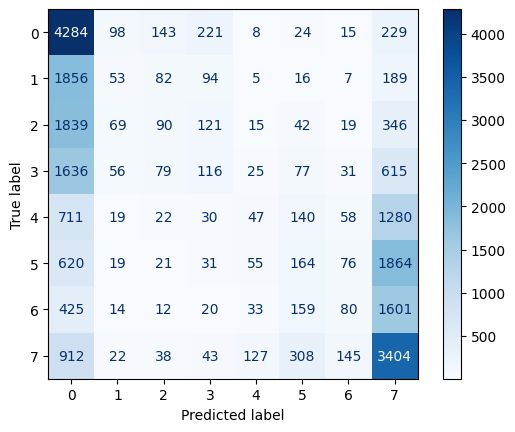

In [49]:
ConfusionMatrixDisplay.from_predictions(Y_test_le, ypred, cmap= plt.cm.Blues)